### Importação dos dados



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [ ]:
import matplotlib.pyplot as plt

# O que você vai praticar:
- Carregar e manipular dados CSV com a biblioteca Pandas .
- Criar visualizações de dados com biblioteca Matplotlib.
- Analisar métricas como faturamento, avaliações e desempenho de vendas.

### Requisitos:
- Analisar os dados das lojas:
- Você deve avaliar informações como faturamento, categorias mais vendidas, avaliações dos clientes, produtos mais vendidos e frete médio.
- Criar gráficos para visualização:
- Decida quais tipos de gráficos usar para apresentar os resultados de maneira clara e visual.
- Mínimo de 3 gráficos diferentes, que podem incluir gráficos de barras, pizza, dispersão, entre outros.

### Apresentar uma recomendação:
- Após as análises, escreva um texto explicando qual loja o Senhor João deve vender e por quê, com base nos dados apresentados.

#1. Análise do faturamento


In [ ]:
# Unindo os dados em uma unica tabela
loja['loja'] = 'Loja 1'
loja2['loja'] = 'Loja 2'
loja3['loja'] = 'Loja 3'
loja4['loja'] = 'Loja 4'

todas_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

In [ ]:
todas_lojas.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


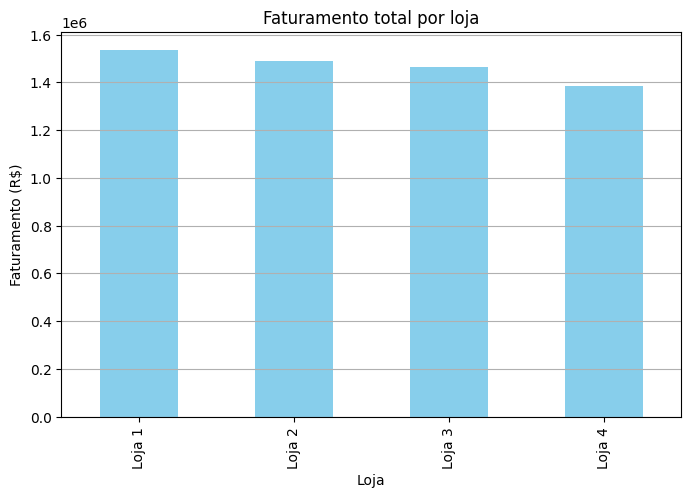

In [135]:
faturamento = todas_lojas.groupby('loja')['Preço'].sum().sort_values(ascending=False)
cores = ['orange' if loja == 'Loja 1' else 'skyblue' for loja in avaliacoes.index]
plt.figure(figsize=(8,5))
faturamento.plot(kind='bar', color='skyblue')
plt.title('Faturamento total por loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Loja')
plt.grid(axis='y')
plt.show()

# 2. Vendas por Categoria


In [ ]:
# Categorias mais vendidas (em quantidade)
categorias = todas_lojas.groupby('Categoria do Produto')['Produto'].count().sort_values(ascending=False)

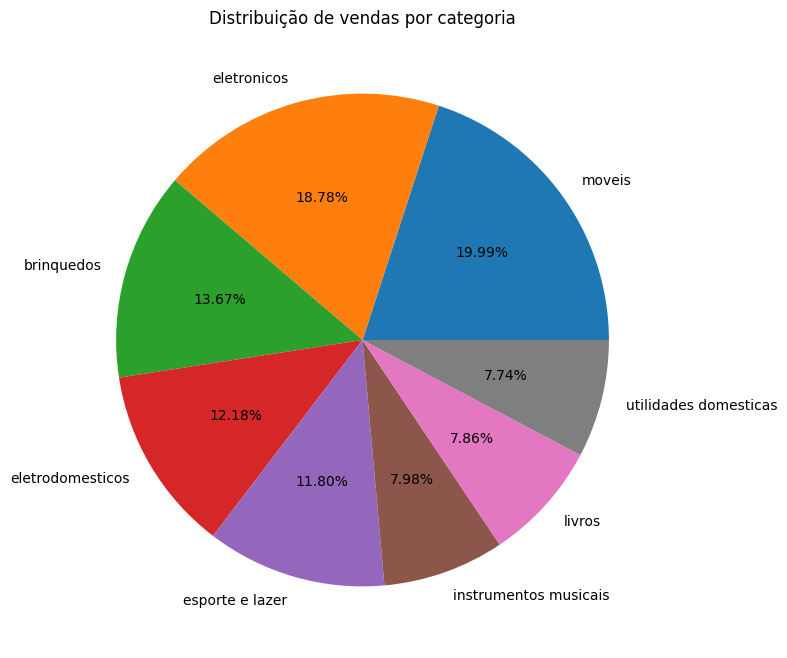

In [ ]:
# Grafico pizza (porcentagem %)
plt.figure(figsize=(8,8))
categorias.plot(kind='pie', autopct='%1.2f%%')
plt.title('Distribuição de vendas por categoria')
plt.ylabel('')
plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
# Média das avaliações de cada loja

# definindo a variável que acessará a tabela geral
avaliacoes = todas_lojas.groupby('loja')['Avaliação da compra'].mean()

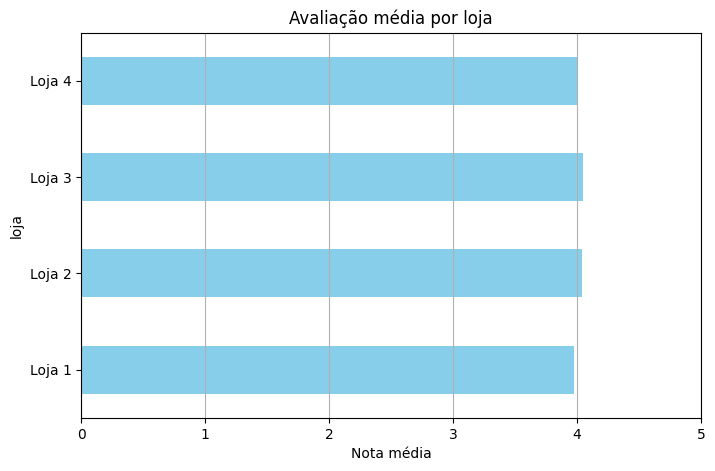

In [136]:
plt.figure(figsize=(8,5))
avaliacoes.plot(kind='barh', color='skyblue')
plt.title('Avaliação média por loja')
plt.xlabel('Nota média')
plt.grid(axis='x')
plt.xlim(0, 5)
plt.show()

# 4. Produtos Mais e Menos Vendidos

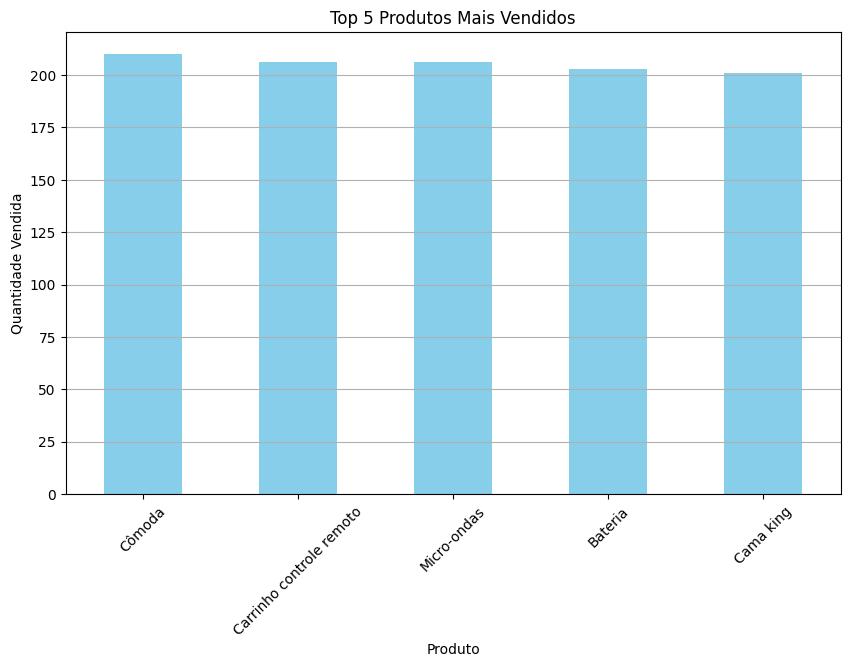

In [ ]:
# Produtos mais vendidos, top 5
mais_vendidos = todas_lojas.groupby('Produto')['Produto'].count().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,6))
mais_vendidos.plot(kind='bar', color='skyblue')
plt.title('Top 5 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

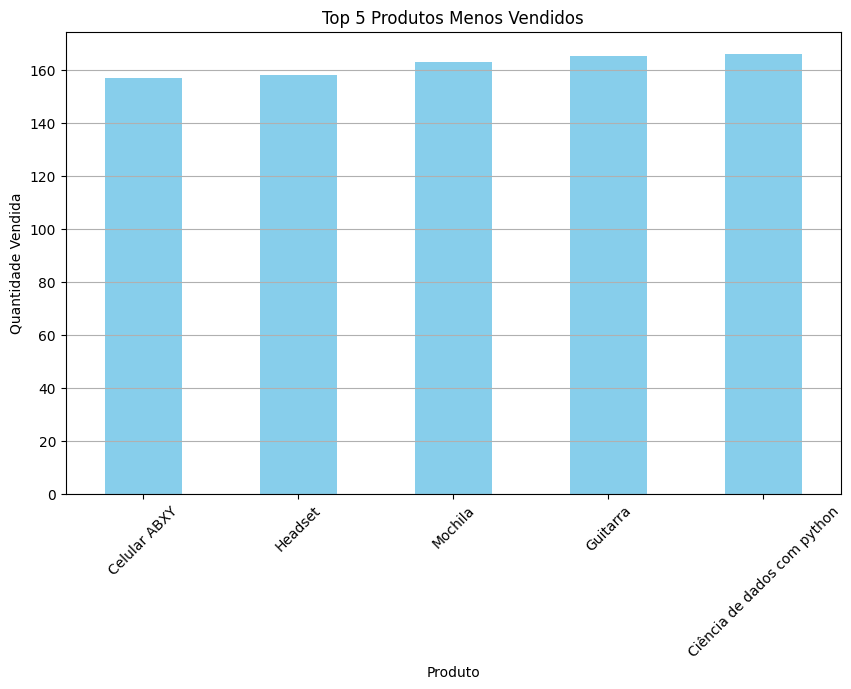

In [ ]:
# Produtos menos vendidos, também em top 5
menos_vendidos = todas_lojas.groupby('Produto')['Produto'].count().sort_values(ascending=True).head(5)

plt.figure(figsize=(10,6))
menos_vendidos.plot(kind='bar', color='skyblue')
plt.title('Top 5 Produtos Menos Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 5. Frete Médio por Loja


In [ ]:
frete_medio = todas_lojas.groupby('loja')['Frete'].mean().sort_values().round(2)

In [ ]:
tabela_preco_medio = frete_medio.reset_index()
tabela_preco_medio.columns = ['Loja', 'Preço Médio']

tabela_preco_medio['Preço Médio'] = tabela_preco_medio['Preço Médio'].apply(lambda x: f'R$ {x:.2f}')

print(tabela_preco_medio)

     Loja Preço Médio
0  Loja 4    R$ 31.28
1  Loja 3    R$ 33.07
2  Loja 2    R$ 33.62
3  Loja 1    R$ 34.69


# Recomendação para Senhor João

Após os estudos e avaliações sobre as lojas, não é possível dizer qual é exatamente a melhor. Deve-se ver qual a prioridade do Senhor João:
- Faturamnetos?
 - Se sim, escolha a loja 1
- Ou por avaliações?
 - Caso seja essa, escolha a loja 3
